# Scikit learn 101


* Be an user of AI first, then you can be an AI engineer or researcher.
* First do it, then do it right, then do it better.

**We're gonna 'Do ML' today.<br> after this lab, you will be a ML user**
* step1 : distinguish the problem, classification or regression
* step2 : Google it!
    * [sklearn] [the name of algorithm] [regression or classification]
    * example> sklearn randomforest regression
* step3 : do ML !
    1. import
    2. declare
    3. fit
    4. predict

In [ ]:
###################
## Run this cell ##
###################
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

print("Classification or Regression?")
print("-----------------------------")
print(boston.DESCR)

Classification or Regression?
-----------------------------
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      fu

In [ ]:
"""
Training set for train model.
Test set for final evaluation ( to estimate generalization error )
"""
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['MEDV'], axis=1), df['MEDV'],
                                                    test_size=0.2, random_state=2021) #훈련데이터 타깃데이터 설정

print(y_train.head())
x_train.head()

28     18.4
498    21.2
284    32.2
414     7.0
123    17.3
Name: MEDV, dtype: float64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92
284,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41


# Example exercise

In [ ]:
# 1. Import what model you want.
from sklearn.linear_model import LinearRegression # after write this code, do ctrl+enter 

# 2. Declare your model.
lr = LinearRegression()

# 3. Fit your model.
lr.fit(x_train, y_train)

# 4. predict using your fitted model.
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#과제를 시작하기 앞서 데이터가 어떤 의미를 가지는 데이터인지 이해를 하는 것이 중요하다고 생각합니다. 간단하게 분석만 하겠습니다.

In [ ]:
df.isnull().sum() #결측값 없습니다.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


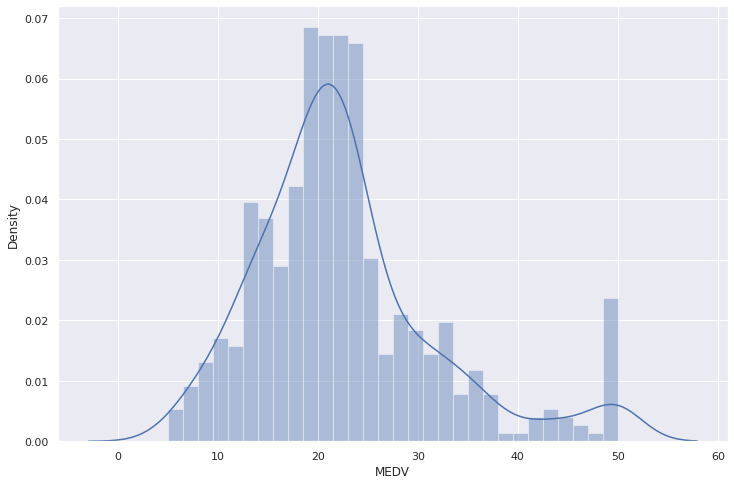

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['MEDV'], bins=30)
plt.show() 
#seaborn library의 distplot함수를 통해 target data인 MEDV를 관찰해 보았습니다.

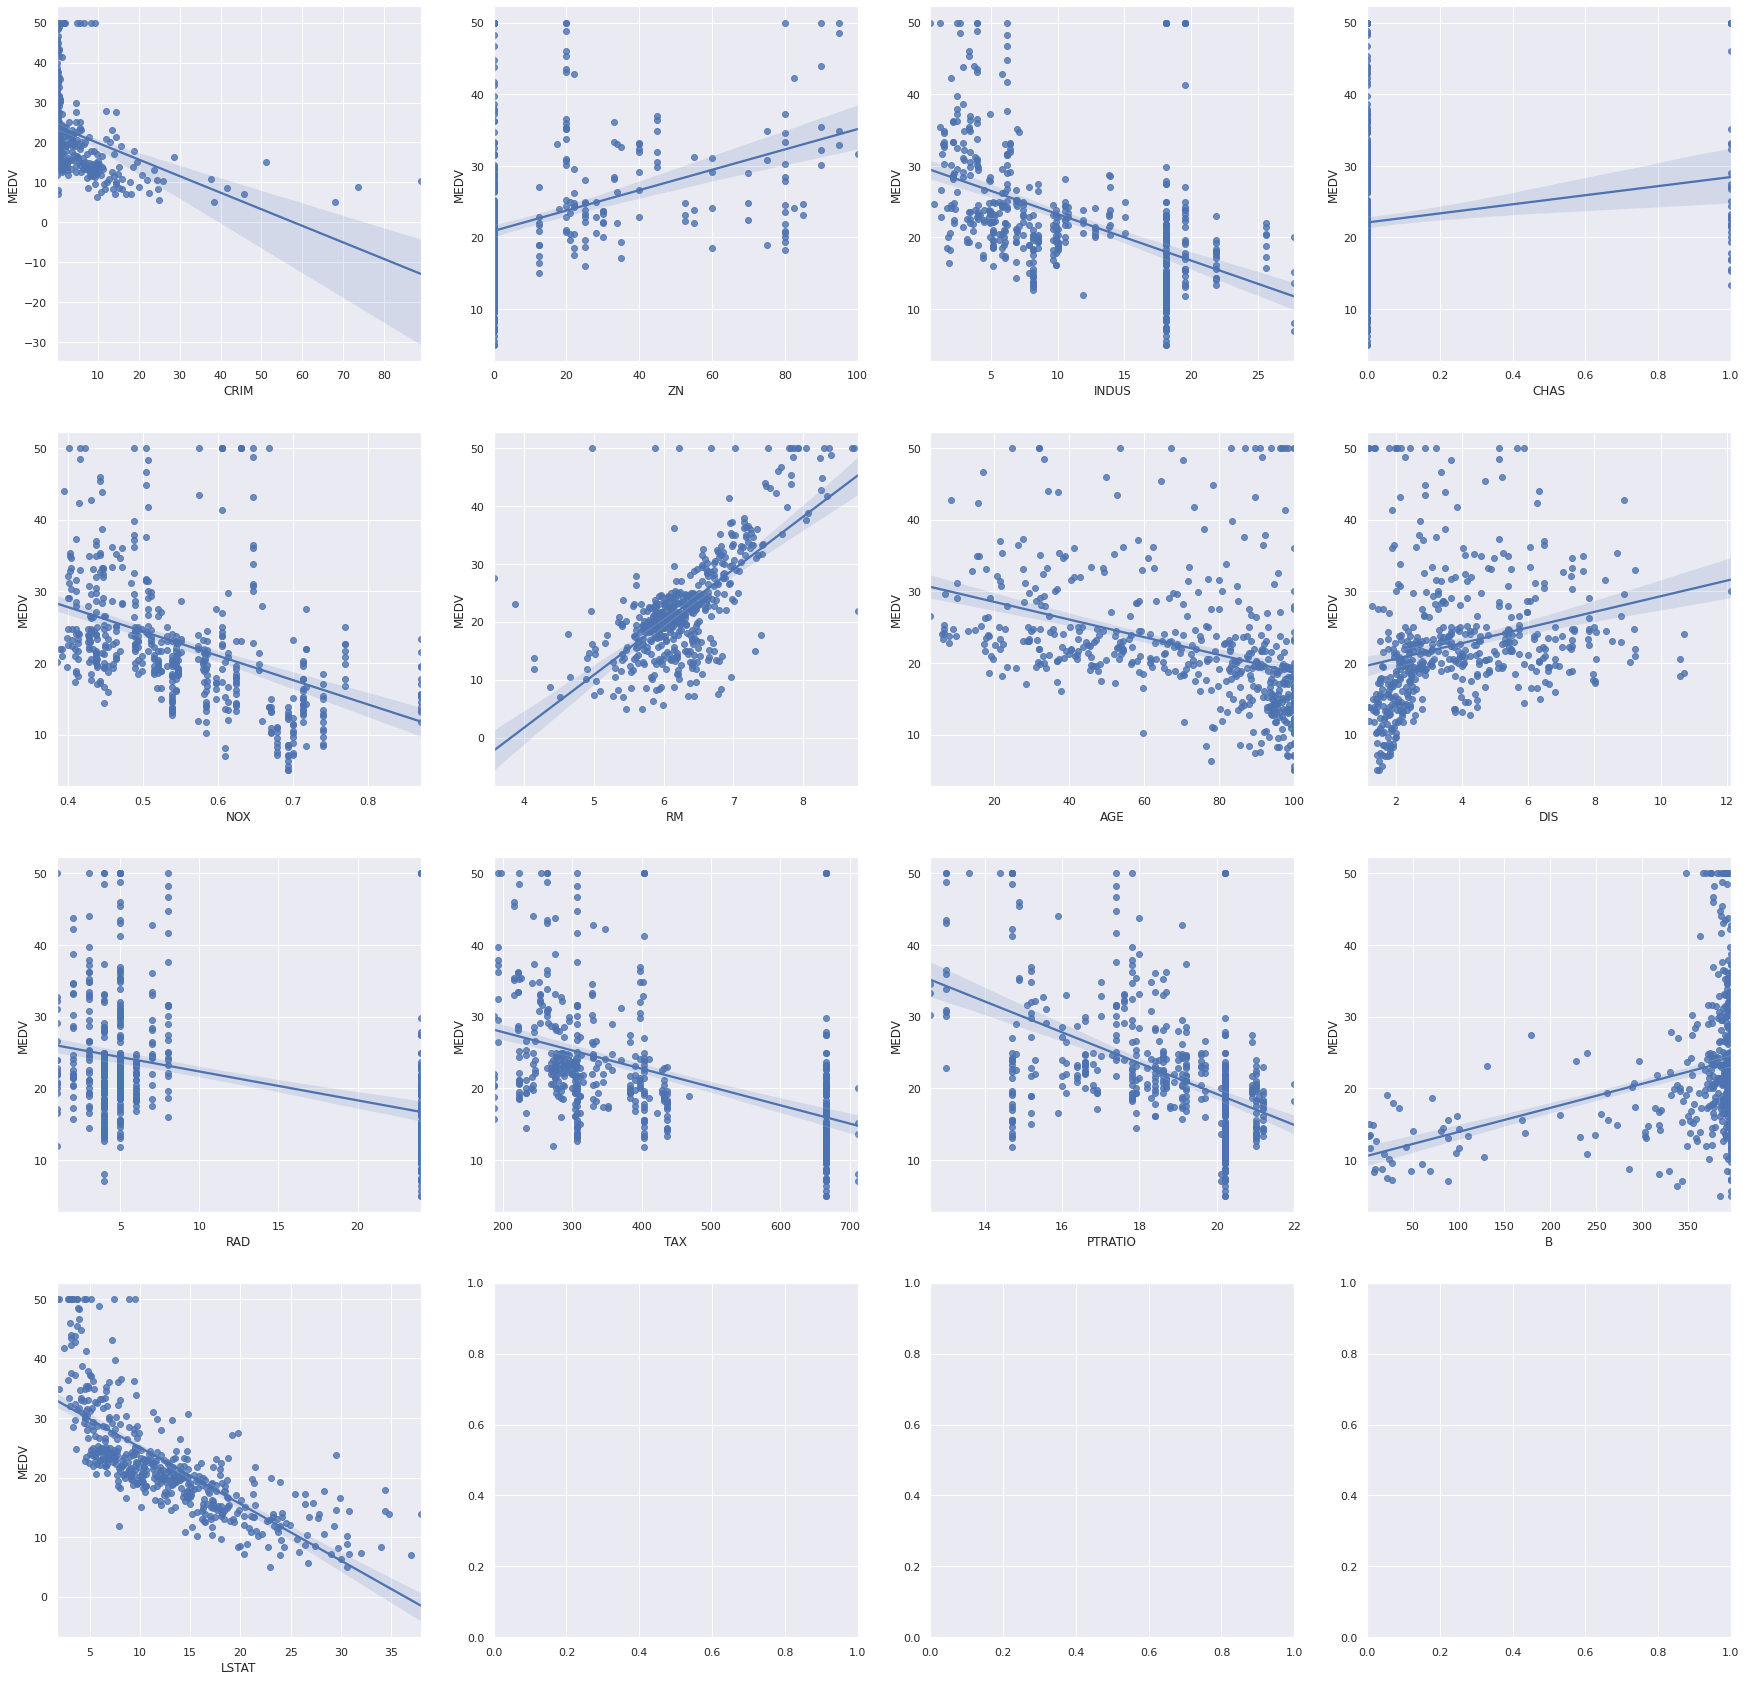

In [ ]:
fig,axs=plt.subplots(figsize=(30,30),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
for i ,feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    sns.regplot(x=feature,y='MEDV',data=df,ax=axs[row][col])

#모든 특징을 관찰한 결과 RM, LSTAT가 영향을 크게 미칩니다.
#가구당 평균 방수가 많을 수록(RM) 주택의 가치(MEDV)가 높고 지위가 낮을수록(LSTAT) 주택의 가치(MEDV)가 낮아 집니다.

간단 하게 분석을 하였습니다! 

#결국에는 저런 특징들을 이용하여 실수형 데이터 타입이자 타깃 데이터인 MEDV값을 예측 하여야 합니다 <b>(회귀)</b>

# Exercise 1 : Train KNN model for this problem, and make prediction using test set.



In [ ]:
####################
## Your code here ##
####################

# 1. Import what model you want.
from sklearn.neighbors import KNeighborsRegressor

# 2. Declare your model.
knr = KNeighborsRegressor(n_neighbors = 10) #10은 그냥 제가 임의로 설정했습니다.

# 3. Fit your model.
knr.fit(x_train, y_train)

# 4. predict using your fitted model.
y_pred = knr.predict(x_test)

k최근접 이웃의 개념은 유사한 특성을 가진 데이터는 유사한 범주에 속하는 경향이 있다는 가정하에 사용합니다.

[knn기본개념](https://hleecaster.com/ml-knn-concept/)을 참고하기 좋습니다.

이러한 knn모델 사용법은 [knn모델사용법](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)을 참고하기 좋습니다.

# Exercise 2 : Train decision tree for this problem, and make prediction using test set.

In [ ]:
####################
## Your code here ##
####################

# 1. Import what model you want.
from sklearn.tree import DecisionTreeRegressor

# 2. Declare your model.
dtr = DecisionTreeRegressor()

# 3. Fit your model.
dtr.fit(x_train, y_train)

# 4. predict using your fitted model.
y_pred = dtr.predict(x_test)

의사결정나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형입니다.

[의사결정나무(decision tree)](https://riverzayden.tistory.com/6)을 참고 하기 좋습니다.

이러한 의사결정나무(decision tree)모델 사용법은 [의사결정나무(decision tree)모델 사용법](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)을 참고하기 좋습니다.

# Exercise 3 : Train support vector machine for this problem, and make prediction using test set.

* **There could be various answers**
* 'SVR' is recommended
* What is the name of support vector machine class for classification in sklearn?

In [ ]:
####################
## Your code here ##
####################

# 1. Import what model you want.
from sklearn.svm import SVR

# 2. Declare your model.
svr = SVR() 

# 3. Fit your model.
svr.fit(x_train, y_train)

# 4. predict using your fitted model.
y_pred = svr.predict(x_test)

서포터 벡터는 새로운 데이터가 들어왔을 때, 해당 데이터를 구분시켜 줄 기준이 되는 선을 의미합니다

[서포터벡터(support vector machine)](https://wooono.tistory.com/111)을 참고 하기 좋습니다.

이러한 서포터벡터(support vector machine)모델 사용법은 [서포터벡터(support vector machine)모델 사용법](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)을 참고하기 좋습니다

# Exercise 4 : Train gradient boosting model for this problem, and make prediction using test set.

In [ ]:
####################
## Your code here ##
####################

# 1. Import what model you want.
from sklearn.ensemble import GradientBoostingRegressor

# 2. Declare your model.
gbr=GradientBoostingRegressor()
# 3. Fit your model.
gbr.fit(x_train, y_train)

# 4. predict using your fitted model.
y_pred = gbr.predict(x_test)

gradient boosting regression tree는 여러 개의 decision tree를 묶어 강력한 model을 만드는 ensemble기법입니다.

[gradient boosting model](https://woolulu.tistory.com/30)을 참고하기 좋습니다.

이러한 gradient boosting model 사용법은 [gradient boosting model 사용법](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)을 참고하기 좋습니다.

# This time, we'll use another dataset

In [ ]:
###################
## Run this cell ##
###################
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

print("Classification or Regression?")
print("-----------------------------")
print(cancer.target_names)
print("-----------------------------")
print(cancer.DESCR)

Classification or Regression?
-----------------------------
['malignant' 'benign']
-----------------------------
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these 

In [ ]:
"""
Training set for train model.
Test set for final evaluation ( to estimate generalization error )
"""
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['class'], axis=1), df['class'],
                                                    test_size=0.2, random_state=2021) #훈련데이터 타깃데이터 설정

print(y_train.head())
x_train.head()

269    1
51     1
187    1
28     0
199    0
Name: class, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
269,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,0.3198,1.4890,2.230,20.74,0.008902,0.047850,0.07339,0.017450,0.02728,0.007610,11.69,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701
51,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,0.1872,0.9234,1.449,14.55,0.004477,0.011770,0.01079,0.007956,0.01325,0.002551,14.67,23.19,96.08,656.7,0.1089,0.1582,0.1050,0.08586,0.2346,0.08025
187,11.71,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,0.06095,0.2451,0.7655,1.742,17.86,0.006905,0.008704,0.01978,0.011850,0.01897,0.001671,13.01,21.39,84.42,521.5,0.1323,0.1040,0.1521,0.10990,0.2572,0.07097
28,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,0.4390,1.0120,3.498,43.50,0.005233,0.030570,0.03576,0.010830,0.01768,0.002967,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.20240,0.4027,0.09876
199,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.015970,0.02000,0.007303,0.01522,0.001976,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130


#과제를 시작하기 앞서 데이터가 어떤 의미를 가지는 데이터인지 이해를 하는 것이 중요하다고 생각합니다. 간단하게 분석만 하겠습니다.

In [ ]:
df.isnull().sum() #결측값은 없습니다.

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

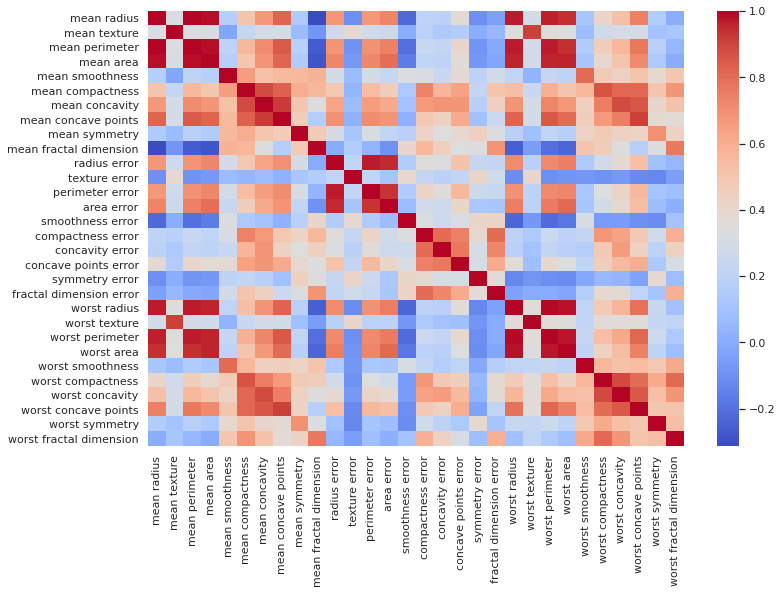

In [ ]:
import seaborn as sns
corr = df.iloc[:,0:30].corr()
corr
display(sns.heatmap(corr,cmap="coolwarm"))
#특성들간의 상관관계 분석. 중복되는 특성들이 보이긴 합니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


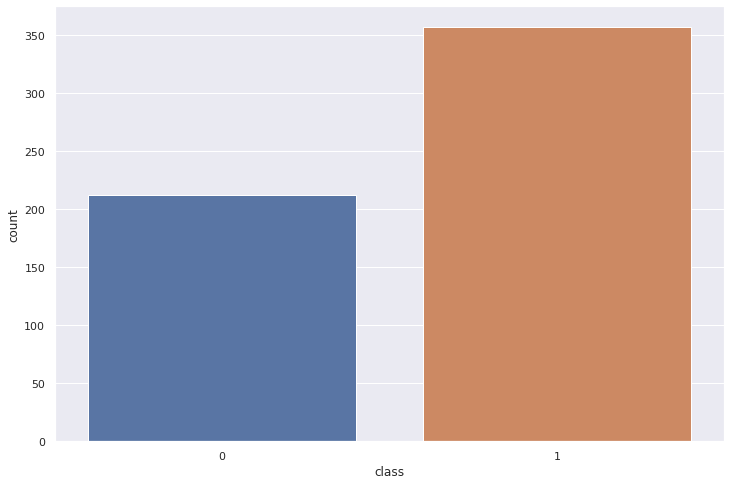

In [ ]:
sns.countplot(df['class']) 
# 0: 악성, 1: 양성  불균형데이터 까지는 안해도 될것 같습니다.

간단 하게 분석을 하였습니다! 

#결국에는 저런 특징들을 이용하여 타깃 데이터인 class값을 예측 하여야 합니다 <b>(이진 분류)</b>

# Exercise 5 : Train logistic regression for this problem, and make prediction using test set.

**Note**
* Actually, logistic regression is to estimate the probability of the class.
* In this time, we just use logistic regression as a classifier.
    - Sklearn do below automatically
        - If probability >= 0.5 : 1 (class 1)
        - else : 0 (class 0)
* You can ignore the convergence warning

In [ ]:
####################
## Your code here ##
####################

# 1. Import what model you want.
from sklearn.linear_model import LogisticRegression

# 2. Declare your model.
LR = LogisticRegression()

# 3. Fit your model.
LR.fit(x_train, y_train)

# 4. predict using your fitted model.
y_pred = LR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


로지스틱 회귀(Logistic Regression)는 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘입니다.

[로지스틱 회귀(Logistic Regression)](https://hleecaster.com/ml-logistic-regression-concept/)를 참고하기 좋습니다.

이러한 로지스틱 회귀(Logistic Regression) 사용법은 [로지스틱 회귀(Logistic Regression) 사용법](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)을 참고하기 좋습니다.



# Exercise 6 : Train AdaBoost for this problem, and make prediction using test set.

In [ ]:
####################
## Your code here ##
####################

# 1. Import what model you want.
from sklearn.ensemble import AdaBoostClassifier

# 2. Declare your model.
abc = AdaBoostClassifier(n_estimators=10, random_state=0)

# 3. Fit your model.
abc.fit(x_train, y_train)

# 4. predict using your fitted model.
y_pred = abc.predict(x_test)

AdaBoost는 약한 분류기들이 상호보완적인 방식(adaptive한 방식)으로 학습해나가고, 이 약분류기들을 조합하여 하나의 강력한 성능을 가진 강분류기를 만들수 있습니다.

[AdaBoost](https://dohk.tistory.com/217#:~:text=Adaptive%20Boosting%EC%9D%98%20%EC%95%BD%EC%9E%90.,%EC%9C%BC%EB%A1%9C%20%EC%B0%BE%EC%95%84%EB%82%98%EA%B0%80%EB%8A%94%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EC%9D%B4%EB%8B%A4.)를 참고하기 좋습니다.

이러한 AdaBoost사용법은 [AdaBoost사용법](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)을 참고하기 좋습니다.

# Exercise 7 : Train random forest for this problem, and make prediction using test set.

In [ ]:
####################
## Your code here ##
####################

# 1. Import what model you want.
from sklearn.ensemble import RandomForestClassifier


# 2. Declare your model.
rfc= RandomForestClassifier(n_estimators=10)

# 3. Fit your model.
rfc.fit(x_train, y_train)

# 4. predict using your fitted model.
y_pred = rfc.predict(x_test)

Random Forest는 여러 의사 결정 나무를 생성한 후에 다수결 또는 평균에 따라 출력 변수를 예측하는 알고리즘입니다.

[Random Forest](https://jjeongil.tistory.com/908)를 참고하기 좋습니다.

이러한 Random Forest사용법은 [Random Forest사용법](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)을 참고하기 좋습니다.

# Exercise 8 : Train artificial neural network for this problem, and make prediction using test set.

**note**
* Just for exercise, we will use Keras ( Highlevel API of Tensorflow 2.x ) for deep learning

In [ ]:
####################
## Your code here ##
####################

# 1. Import what model you want.
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
x, y = make_classification(n_samples=30, random_state=1)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['class'], axis=1), df['class'],
                                                    test_size=0.2, random_state=2021)
# 2. Declare your model.
mlp = MLPClassifier(hidden_layer_sizes=(30,), batch_size=5, max_iter=30, random_state=2021)

# 3. Fit your model.
mlp.fit(x_train, y_train)

# 4. predict using your fitted model.
y_pred = mlp.predict(x_test)

인공 신경망은 이러한 뇌의 신경망을 본 떠 만든 알고리즘 중 하나 입니다. 

[인공신경망](https://kofboy2000.tistory.com/30)를 참고하기 좋습니다.

이러한 인공신경망 사용법은 [인공신경망 사용법](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)을 참고하기 좋습니다.

In [ ]:
print(x_train.shape, y_train.shape)

(455, 30) (455,)


In [ ]:
####################
## Your code here ##
####################

# 1. Import what model you want.
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# 2. Declare your model.
model = keras.Sequential()
model.add(keras.layers.Dense(30, activation='relu', name='hidden',input_shape=(30,)))
#은닉층, relu활성화 함수
model.add(keras.layers.Dense(1, name='output', activation='sigmoid'))
#출력층, sigmoid활성화 함수(이진분류)
model.summary()
#입력층(30) X 은닉층(30) + 30 = 930
#은닉층(30) X 출력층(1) + 1 = 31
model.compile(loss='binary_crossentropy',metrics='accuracy')
#손실함수 설정 이진분류 : binary_crossentropy

# 3. Fit your model.
model.fit(x_train, y_train, epochs=30, batch_size=5)
#에포크 20, 배치사이즈 5

# 4. predict using your fitted model.
print(" ")
model.evaluate(x_test, y_test)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 30)                930       
_________________________________________________________________
output (Dense)               (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
91/91 [==============================] - 1s 1ms/step - loss: 26.6205 - accuracy: 0.3297
Epoch 2/30
91/91 [==============================] - 0s 1ms/step - loss: 1.6151 - accuracy: 0.6571
Epoch 3/30
91/91 [==============================] - 0s 1ms/step - loss: 0.8777 - accuracy: 0.7956
Epoch 4/30
91/91 [==============================] - 0s 1ms/step - loss: 0.7803 - accuracy: 0.8396
Epoch 5/30
91/91 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.8418
Epoch 6/30
91/91 [========

[0.4813460409641266, 0.9035087823867798]

# Summary

1. We should be able to use ML first, which makes you learn ML faster.
2. We should be able to distinguish : "Classification or Regression"
3. Almost every algorithm could be used for classification and regression